# 广义线性模型 Generalized Linear Models
---
本章主要讲述一些用于回归的方法，其中目标值 y 是输入变量 x 的线性组合。 数学概念表示为：如果$\hat{y}$是预测值，那么有：

$\hat{y}(\theta, x) = \theta^{(0)} + \theta^{(1)} x^{(1)} + ... + \theta^{(p)} x^{(p)}$

在整个模块中，我们定义向量 $w = (\theta_1,..., \theta_p)$ 作为`coef_`(coefficient, 回归系数)，定义 $\theta_0$ 作为 `intercept_`截距.
线性模型虽简单, 却有丰富的变化.考虑单调可微函数$g(\cdot)$
($g(\cdot)$连续且充分光滑), 令

$$y = g^{-1}(\theta^Tx+b)$$
这样得到的模型称为`广义线性模型`,函数$g(\cdot)$称为`联系函数`(link function). 对数线性回归(Logistic Regression)是$g(\cdot)=ln(\cdot)$时的特例

## 线性回归
---

回归的目的是预测数值型的目标值。最直接的办法是依据输入写出一个目标值的计算公式。

假如你想要预测兰博基尼跑车的功率大小，可能会这样计算:

HorsePower = 0.0015 * annualSalary - 0.99 * hoursListeningToPublicRadio

这就是所谓的 `回归方程(regression equation)`，其中的 0.0015 和 -0.99 称作 `回归系数（regression weights）`，求这些回归系数的过程就是回归。

给定数据集 $D = \{(x_1, y_1), (x_2, y_2), \cdots, (x_n, y_n)\}$, 其中$x_i=(x_i^{(1)}, x_i^{(2)}, \cdots, x_i^{(d)}), y_i \in \mathbb{R}$. 线性回归(linear regression)试图学得一个线性模型以尽可能准确地预测实值输出标记.
$$f(x_i) = \theta^T x_i, 使得f(x_i)\simeq y_i$$

对于离散属性, 若属性值之间存在`序`(order)关系, 可通过连续化将其转为连续值; 若属性值间不存在序关系,假定有k个属性值, 则通常将其转为k维向量(OneHotEncoder)

## 普通最小二乘法 Ordinary Least Squares
---
LinearRegression 拟合一个带有系数$w = (\theta^{(0)}, ...,\theta^{(p)})$的线性模型，使得数据集实际观测数据和预测数据（估计值）之间的残差平方和(对应了常用的欧几里得距离Euclidean distance)最小。其数学表达式为:
$$\underset{\theta}{min} {|| X\theta - y||_2}^2$$
求解\theta使$E_{\theta} = \sum_{i=1}^{p}(\theta^Tx_i-y_i)^2$(loss function)最小化的过程, 称为线性回归模型的最小二乘`参数估计`(parameter estimation). $E_{\theta}$是关于$\theta$的凸函数, 可以令其对$\theta$并令导数为0, 得到$\theta$的最优解的闭式(closed-form)解.

用矩阵形式可以写成$E_{\theta} = (y-X\theta)^T(y-X\theta)$, 对$\theta$求导得到:
$\frac {\partial E_\theta}{\partial \theta} = 2X^T(X\theta-y)$, 令其为0得到$\hat\theta = (X^TX)^{-1}X^Ty$

需要对矩阵求逆，因此这个方程只在逆矩阵存在的时候适用，我们在程序代码中对此作出判断。 判断矩阵是否可逆的一个可选方案是:

判断矩阵的行列式是否为 0，若为0，矩阵就不存在逆矩阵，不为0的话，矩阵才存在逆矩阵。

[矩阵求导参考1](https://blog.csdn.net/daaikuaichuan/article/details/80620518)

[矩阵求导参考2](http://blog.csdn.net/nomadlx53/article/details/50849941)

例子来自**[机器学习实战](https://github.com/apachecn/AiLearning/blob/master/docs/ml/8.%E5%9B%9E%E5%BD%92.md)**
___
数据格式
## 1. 线性回归
```
x0       x1       y
1.000000	0.067732	3.176513
1.000000	0.427810	3.816464
1.000000	0.995731	4.550095
1.000000	0.738336	4.256571
1.000000	0.981083	4.560815
```

In [1]:
import numpy as np
np.set_printoptions(precision=4, suppress=True, threshold=15)

In [2]:
class SingularMatrixError(Exception):
    pass

In [3]:
data = np.loadtxt('data.txt')
data

array([[1.    , 0.0677, 3.1765],
       [1.    , 0.4278, 3.8165],
       [1.    , 0.9957, 4.5501],
       ...,
       [1.    , 0.0701, 3.2138],
       [1.    , 0.5271, 3.9527],
       [1.    , 0.1162, 3.1293]])

In [4]:
# 取X 和 y
X, y = data[:, :-1], data[:, -1]
X  # 保持 X 为 n_sample * n_feature

array([[1.    , 0.0677],
       [1.    , 0.4278],
       [1.    , 0.9957],
       ...,
       [1.    , 0.0701],
       [1.    , 0.5271],
       [1.    , 0.1162]])

In [5]:
X.T @ X

array([[200.    ,  97.6638],
       [ 97.6638,  64.7684]])

In [6]:
class LinearRegression:
    def __init__(self):
        self.intercept_ = None
        self.coef_ = None
    
    @staticmethod
    def least_squares(X, y):
        A = X.T @ X
        if np.linalg.det(A) == 0.0:
            print('...')
        w = A.I @ X.T @ y
        return w
    
    def fit(self, X, y):
        X = np.mat(X)
        y = np.mat(y[:, np.newaxis])
        theta = self.least_squares(X, y)  # n_feature * 1
        self.intercept_ = theta[0, 0]
        self.coef_ = np.array(theta[1:, 0]).ravel()

In [7]:
import matplotlib.pyplot as plt

In [8]:
def regression1():
    data = np.loadtxt('data.txt')
    X, y = data[:, :-1], data[:, -1]
    clf = LinearRegression()
    clf.fit(X, y)
    print(clf.coef_, clf.intercept_)
    
    def line_(x0):
        return clf.coef_[0] * x0 + clf.intercept_
    
    def corr_(X, y):
        # 使用预测值f(x)和y的相关系数来表示, 预测值和实际值的匹配程度
        corr = np.corrcoef(line_(X[:, 1]).ravel(), y)
        print(f'相关系数:\n{corr}\n')
        
    corr_(X, y)
    plt.figure()
    plt.scatter(X[:,1], y[:], c='r', edgecolors='k')
    xmin, xmax = X[:, 1].min(), X[:, 1].max()
    plt.plot([xmin, xmax], [line_(xmin), line_(xmax)])
    plt.show()

[1.6953] 3.0077432426975905
相关系数:
[[1.     0.9865]
 [0.9865 1.    ]]



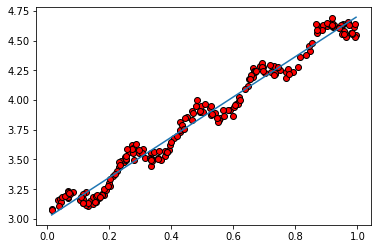

In [9]:
regression1()

**使用 sklearn**

In [10]:
from sklearn.linear_model import LinearRegression
data = np.loadtxt('data.txt')
X, y = data[:, [1]], data[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)
clf = LinearRegression()
clf.fit(X, y)
clf.coef_, clf.intercept_

(array([1.6953]), 3.007743242697591)

### 普通最小二乘法的复杂度
该方法使用 X 的奇异值分解来计算最小二乘解。如果 X 是一个形状为 $(n_{samples}, n_{features})$的矩阵，设
$n_{samples} \geq n_{features}$, 则该方法的复杂度为$O(n_{samples} n_{fearures}^2)$

## 2 局部加权线性回归
---
线性回归的一个问题是有可能出现欠拟合现象，因为它求的是具有最小均方差的[无偏估计](https://www.zhihu.com/question/22983179)。显而易见，如果模型欠拟合将不能取得最好的预测效果。所以有些方法允许在估计中引入一些偏差，从而降低预测的均方误差。

一个方法是`局部加权线性回归`（Locally Weighted Linear Regression，LWLR）。在这个算法中，我们给预测点附近的每个点赋予一定的权重()，然后与 线性回归 类似，在这个子集上基于最小均方误差来进行普通的回归。我们需要最小化的目标函数大致为:
$$\sum_i w_i(y_i-\theta^Tx_i)^2$$
参考最小二乘法,
$$
\begin{aligned}J(\theta)
&= \sum_{i=1}^m w_i(y_i-h_{\theta}(x_i))^2 \\
&= (X\theta - y)^TW(X\theta-y)\end{aligned}
$$
$J(\theta)$对$\theta$求导:
$$\nabla_{\theta}J(\theta) = 2X^TWX\theta - 2X^TWy$$
该算法解出回归系数 $\theta$ 的形式如下:
$$\hat \theta = (X^TWX)^{-1}X^TWy$$

LWLR 使用 “核”（与支持向量机中的核类似）来对附近的点赋予更高的权重。核的类型可以自由选择，最常用的核就是高斯核，高斯核对应的权重如下:
$$w(i, i) = exp\left(\frac {(x_i-x)^2}{-2k^2}\right)$$

这样就构建了一个只含对角元素的权重矩阵 w，并且点 x 与 $x_i$ 越近，w(i, i) 将会越大。上述公式中包含一个需要用户指定的参数 k ，它决定了对附近的点赋予多大的权重，这也是使用 LWLR 时唯一需要考虑的参数，下面的图给出了参数 k 与权重的关系。

In [11]:
def plt_w_(x, k):
    # 预测点x=.5
    x_diff = x - .5
    return np.exp(x_diff.T * x_diff / (-2 * k**2))

[0.6065 0.609  0.6114 ... 0.6114 0.609  0.6065]


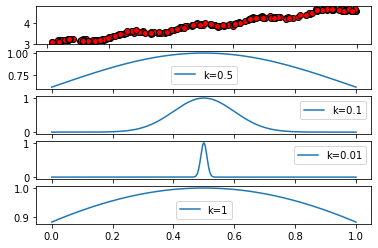

In [12]:
figure = plt.figure()
ax1, ax2, ax3, ax4, ax5 = figure.subplots(5)
ax1.scatter(X[:,0], y[:], c='r', edgecolors='k')
x_ = np.linspace(0, 1, 500)
print(plt_w_(x_, 0.5))
ax2.plot(x_, plt_w_(x_, 0.5), label='k=0.5')
ax2.legend()
ax3.plot(x_, plt_w_(x_, 0.1), label='k=0.1')
ax3.legend()
ax4.plot(x_, plt_w_(x_, 0.01), label='k=0.01')
ax4.legend()
ax5.plot(x_, plt_w_(x_, 1), label='k=1')
ax5.legend()

上面的图是 每个点的权重图（假定我们正预测的点是 x = 0.5），最上面的图是原始数据集，第二个图显示了当 k = 0.5 时，大部分的数据都用于训练回归模型；而最下面的图显示当 k=0.01 时，仅有很少的局部点被用于训练回归模型。

In [13]:
class LinearRegression_LW:
    def __init__(self, k=1):
        self.k_ = k
        self.X = None
        self.y = None
    
    @staticmethod
    def weight(X, k, test_point):
        # 计算每个测试点时, 其他点的权重
        n_sample = X.shape[0]
        w = np.eye(n_sample)
        for i in range(n_sample):
            diff_X = X[i,:] - test_point
            w[i,i] = np.exp(diff_X * diff_X.T / (-2 * k**2))
        return w
    
    def fit(self, X, y):
        self.X = np.mat(X)
        self.y = np.mat(y[:, np.newaxis])
        
    def predict(self, test_points):
        y_pred = np.zeros(test_points.shape[0]) # n_sample, 
        
        for i in range(test_points.shape[0]):
            test_point = test_points[i, :]
            w = self.weight(self.X, self.k_, test_point)
            A = self.X.T * w * self.X
            if np.linalg.det(A) == 0.0:
                raise SingularMatrixError('奇异矩阵, 用其它方法求')
            theta = A.I * self.X.T * w * self.y
            y_pred[i] = test_point * theta  # 1*nf * n_f*1
        return y_pred
    

In [14]:
def regression2():
    data = np.loadtxt('data.txt')
    X, y = data[:, :-1], data[:, -1]
    
    fig = plt.figure(figsize=(10, 8))
    for ax, k in zip(fig.subplots(3), (1, 0.01, 0.003)):
        clf = LinearRegression_LW(k)
        clf.fit(X, y)
        ax.scatter(X[:,1], y[:], c='r', edgecolors='k', s=2)
        y_pred = clf.predict(X)
        print(f'k:{k}, errorr: {((y_pred - y)**2).sum()}')
        ind = X[:, 1].argsort()  # x 从小到大排序
        ax.plot(X[:, 1][ind], y_pred[ind])  # 画出 预测的曲线
    plt.show()

k:1, errorr: 1.3549611527404866
k:0.01, errorr: 0.14882948943307406
k:0.003, errorr: 0.0686598293113492


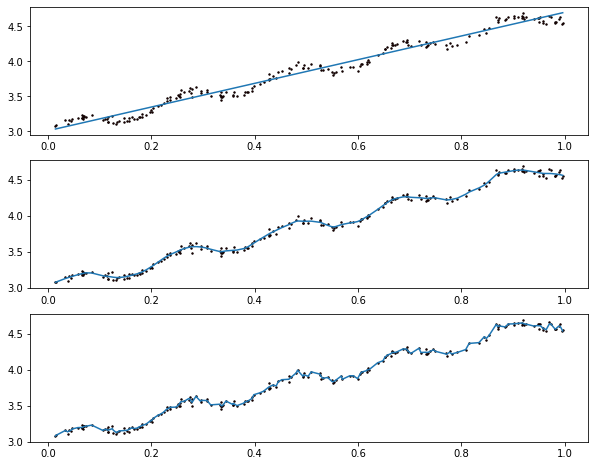

In [15]:
regression2()

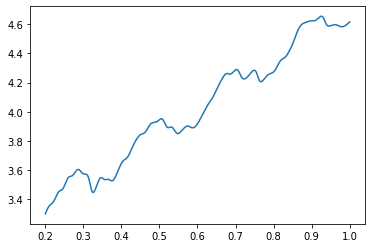

In [16]:
clf = LinearRegression_LW(0.01)
clf.fit(X, y)

X_new = np.linspace(0.2, 1, 500).reshape(-1, 1)

y_pred = clf.predict(X_new)
plt.plot(X_new.ravel(), y_pred)

上图使用了 3 种不同平滑值绘出的局部加权线性回归的结果。上图中的平滑系数 k =1.0，中图 k = 0.01，下图 k = 0.003 。可以看到，k = 1.0 时的使所有数据等比重，其模型效果与基本的线性回归相同，k=0.01时该模型可以挖出数据的潜在规律，而 k=0.003时则考虑了太多的噪声，进而导致了过拟合现象。

### 示例: 预测鲍鱼的年龄
---
将数据分为测试集和训练集

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
data = np.loadtxt('abalone.txt')
data.shape

(4177, 9)

In [19]:
def abalone_age():
    data = np.loadtxt('abalone.txt')
    for i in range(10):
        print("*"*30)
        print(f'第{i+1}次测试:')
        X, y = data[300*i:300*i + 300, :-1], data[300 * i:300*i + 300, -1]  # 每次取300来测试
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)
        def error_(y1, y2):
            return ((y1-y2)**2).sum() / len(y1)
        for k in (10, 1, 0.1):  # 不同的核
            clf = LinearRegression_LW(k)
            clf.fit(X_train, y_train)
            try:
                y_pred_train = clf.predict(X_train)
                y_pred_test = clf.predict(X_test)
                print(f"k:{k}, 训练集误差: {error_(y_train, y_pred_train)}, 测试集误差: {error_(y_test, y_pred_test)}")
            except SingularMatrixError as e:
                print(e.args)
                continue
    

In [20]:
abalone_age()

******************************
第1次测试:
k:10, 训练集误差: 5.171233459892353, 测试集误差: 5.243681590025153
k:1, 训练集误差: 4.646702737123547, 测试集误差: 5.953990142434663
k:0.1, 训练集误差: 2.7338306163666526, 测试集误差: 205.1958341114822
******************************
第2次测试:
k:10, 训练集误差: 7.103590782637383, 测试集误差: 5.908938991796509
k:1, 训练集误差: 6.524593977748529, 测试集误差: 6.41062291588486
('奇异矩阵, 用其它方法求',)
******************************
第3次测试:
k:10, 训练集误差: 6.6251626296997985, 测试集误差: 5.6718644607504975
k:1, 训练集误差: 6.138224172624932, 测试集误差: 5.413431560329278
('奇异矩阵, 用其它方法求',)
******************************
第4次测试:
k:10, 训练集误差: 1.0001465295982912, 测试集误差: 0.8867747406154668
k:1, 训练集误差: 0.8953941232646255, 测试集误差: 0.8685280888802165
k:0.1, 训练集误差: 0.3451819820289077, 测试集误差: 3.6905534493231738
******************************
第5次测试:
k:10, 训练集误差: 1.1903879753992936, 测试集误差: 1.1913139584075099
k:1, 训练集误差: 1.1332290844455382, 测试集误差: 1.2206469986993356
('奇异矩阵, 用其它方法求',)
******************************
第6次测试:
k:10, 训练集误差: 1.5128771113

根据我们上边的测试，可以看出:
简单线性回归达到了与局部加权现行回归类似的效果

## 3 缩减系数来 “理解” 数据
---
如果数据的特征比样本点还多应该怎么办？是否还可以使用线性回归和之前的方法来做预测？答案是否定的，即我们不能再使用前面介绍的方法。这是因为在计算$(X^TX)^{-1}$ 的时候会出错。

如果特征比样本点还多(n_feature > n_sample)，也就是说输入数据的矩阵x可能不是**满秩矩阵**。非满秩矩阵求逆时会出现问题。
1. 多余的特征, 如某2个特征线性相关
2. 特征数太多 (如$n\_features \leq n\_samples$)

为了解决这个问题，我们引入了`岭回归（ridge regression）`这种缩减方法。接着是`lasso法`，最后介绍`前向逐步回归`。

In [65]:
a = np.arange(12).reshape(3, 4)

In [66]:
A = np.dot(a.T, a)
np.linalg.det(A)

0.0

In [67]:
b = a.reshape(4, 3)
np.linalg.det(np.dot(b.T, b))

-1.0231815394945349e-11

### 3. 1 岭回归 Ridge （L2 惩罚）
---
岭估计器是普通`LinearRegression`的简单正则化（称为`l2`惩罚）, 通过对系数的大小施加惩罚来解决普通最小二乘法的一些问题.  特别是，它具有的优点是，在计算上不比普通的最小二乘估计更昂贵. 
> L2范数是指向量中各元素的的平方和然后再求平方根。有人把它叫“岭回归”（Ridge Regression），有人也叫它“权值衰减weight decay”。
>L2范数与L1不同，他不会让参数等于0，而是让每个参数都接近于0。那么L2范数又有什么好处呢？
- 防止过拟合 : 一般的用法是在损失函数后面加上$\theta$的L2范数。这是一种规则化。
- 优化求解变得稳定快速: 简单地说他可以让$\theta$在接近全局最优点$\theta^*$的时候，还保持着较大的梯度。这样可以跳出局部最优，也使得收敛速度变快。


岭回归最小化的是带罚项的残差平方和
$$\underset {\theta}{min} ||X\theta - y||_2^2 + \alpha ||\theta||_2^2$$
其中， $\alpha \geq 0$ 是控制系数收缩量的复杂性参数： $\alpha$ 的值越大，收缩量越大，模型对共线性的鲁棒性也更强。

与上面的操作一样对$\theta$求导, 
$$\nabla_{\theta}J(\theta) = 2X^T(X\theta-y) + 2\alpha I\theta$$
得到最优的$\hat \theta = (X^TX+\alpha I)^{-1}X^Ty$, 它是一个关于$\alpha$的函数.  
可以这样认为: 岭回归就是在矩阵$X^TX$ 上加一个$\alpha I$从而使得矩阵非奇异，进而能对$X^TX+\alpha I$求逆。其中矩阵I是一个 n_feature * n_feature（等于列数)的单位矩阵

岭回归最先用来处理特征数多于样本数的情况，现在也用于在估计中加入偏差，从而得到更好的估计.通过引入惩罚项，能够减少不重要的参数，这个技术在统计学中也叫作 `缩减(shrinkage)`.

In [21]:
def standard(X):
    return (X - X.mean(0)) / X.std(0) 
data = np.loadtxt('abalone.txt')
X, y = data[:, :-1], data[:, -1]

In [22]:
standard(X)

array([[ 1.152 , -0.5746, -0.4321, ..., -0.6077, -0.7262, -0.6382],
       [ 1.152 , -1.449 , -1.4399, ..., -1.1709, -1.2052, -1.213 ],
       [-1.2807,  0.05  ,  0.1221, ..., -0.4635, -0.3567, -0.2071],
       ...,
       [ 1.152 ,  0.633 ,  0.6764, ...,  0.7486,  0.9754,  0.497 ],
       [-1.2807,  0.8412,  0.7772, ...,  0.7733,  0.7336,  0.4107],
       [ 1.152 ,  1.5491,  1.4826, ...,  2.641 ,  1.7874,  1.8405]])

In [23]:
X.shape

(4177, 8)

In [24]:
def test_ridge(X, y, num=30):
    y = y - y.mean()
    X = (X - X.mean(0)) / X.var(0)
    X = np.mat(X)
    y = np.mat(y)
    # 需要对数据进行标准化处理
    I = np.eye(X.shape[1])
    alpha_list = np.logspace(-10, num-11, num)
    theta_list = []
#     print(f"X是奇异矩阵么: {'yes' if not np.linalg.det(X) else 'no'}")
    for alpha in alpha_list:
        A = (np.dot(X.T, X) + alpha * I)
        theta = A.I * X.T * y
        theta_list.append(theta)
    return theta_list
    

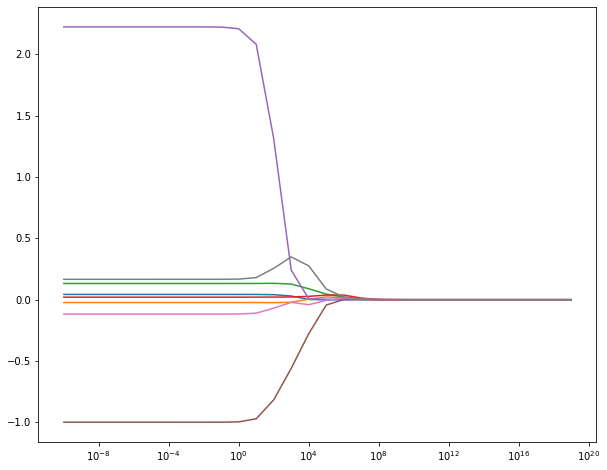

In [25]:
data = np.loadtxt('abalone.txt')
X, y = data[:, :-1], data[:, [-1]]
num = 30
theta_list = test_ridge(X, y, num)
alpha_list = np.logspace(-10, num-11, num)
plt.figure(figsize=(10, 8))
for i in range(X.shape[1]):
    thetas = list(map(lambda x:x[i, 0], theta_list))
    plt.plot(alpha_list, thetas)
ax = plt.gca()
# ax.invert_xaxis()
plt.xscale('log')
plt.show()

𝛼 的值越大，收缩量越大，模型对共线性的鲁棒性也更强. 
在最左边，即𝛼 最小时，可以得到所有系数的原始值（与线性回归一致）；而在右边，系数全部缩减为0；在中间部分的某值将可以取得最好的预测效果。为了定量地找到最佳参数值，还需要进行交叉验证。另外，要判断哪些变量对结果预测最具有影响力，在上图中观察它们对应的系数大小就可以了。

### 3.2 Lasso（L1 惩罚）
---
**套索方法(Lasso，The Least Absolute Shrinkage and Selection Operator)**
Lasso估计器可用于对系数施加稀疏性, 它在一些情况下是有用的，因为它倾向于使用具有较少参数值的情况，有效地减少给定解决方案所依赖变量的数量。 换句话说，如果我们认为许多特征不相关，那么我们会更喜欢它。这是通过所谓的 `l1` 惩罚来完成的。

> L1范数是指向量中各个元素绝对值之和，也叫“稀疏规则算子”（Lasso regularization）

其最小化的目标函数是
$$\underset {\theta} {min} ||X\theta-y||^2 + \alpha||\theta||_1$$

在增加如下约束时，普通的最小二乘法回归会得到与岭回归一样的公式:

$\sum_{k=1}^n \theta_k^2 \leq \alpha$

上式限定了所有回归系数的平方和不能大于$\alpha$。使用普通的最小二乘法回归在当两个或更多的特征相关时，可能会得到一个很大的正系数和一个很大的负系数。正是因为上述限制条件的存在，使用岭回归可以避免这个问题。

与岭回归类似，另一个缩减方法lasso也对回归系数做了限定，对应的约束条件如下:

$\sum_{k=1}^n |\theta_k| \leq \alpha$

唯一的不同点在于，这个约束条件使用绝对值取代了平方和。虽然约束形式只是稍作变化，结果却大相径庭: 在$\alpha$足够小的时候，一些系数会因此被迫缩减到0.这个特性可以帮助我们更好地理解数据。

### 3.3 前向逐步回归 
前向逐步回归算法可以得到与 lasso 差不多的效果，但更加简单。它属于一种贪心算法，即每一步都尽可能减少误差。一开始，所有权重都设置为 0，然后每一步所做的决策是对某个权重增加或减少一个很小的值
伪代码如下:

```
数据标准化，使其分布满足 0 均值 和单位方差
在每轮迭代过程中: 
    设置当前最小误差 lowestError 为正无穷
    对每个特征:
        增大或缩小:
            改变一个系数得到一个新的 w
            计算新 w 下的误差
            如果误差 Error 小于当前最小误差 lowestError: 设置 Wbest 等于当前的 W
        将 W 设置为新的 Wbest
```

In [26]:
def stage_wise_abalone(iter_num=100, epsilon=0.01):
    def standard_(X):
        return (X - X.mean(0)) / X.std(0)
    
    def error_(y1, y2):
        return ((y1-y2)**2).sum() / len(y1)
    
    def stage_wise(X, y, iter_num, epsilon):
        n_sample, n_feature = X.shape
        weights = np.zeros((n_feature, 1))
        weights_best = weights.copy()
        w_list = []
        for i in range(iter_num):
            error_least = np.inf
            for j in range(n_feature):
                for sign in (-1, +1):
                    weights_new = weights.copy()
                    weights_new[j] += sign * epsilon
                    error_new = error_(np.dot(X, weights_new), y)
                    if error_new < error_least:
                        error_least = error_new
                        weights_best = weights_new
                weights = weights_best.copy()
            w_list.append(weights)
        return w_list, error_least
    
    data = np.loadtxt('abalone.txt')
    X, y = data[:, :-1], data[:, [-1]]
    X = standard_(X)
    y = y - y.mean()

    w_list, error_least = stage_wise(X, y, iter_num, epsilon)
    print(f'最终的误差{error_least}')
    plt.figure(figsize=(10, 8))
    for i in range(X.shape[1]):
        thetas = list(map(lambda x:x[i, 0], w_list))
        plt.plot(range(len(w_list)), thetas)

最终的误差4.933337461123535


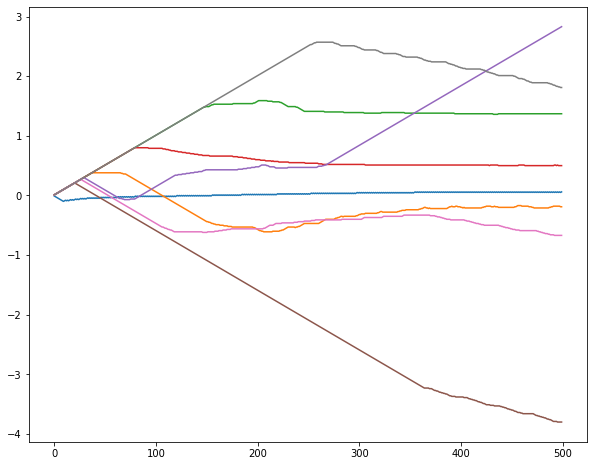

In [27]:
stage_wise_abalone(500, 0.01)

逐步线性回归算法的主要优点在于它可以帮助人们理解现有的模型并作出改进。当构建了一个模型后，可以运行该算法找出重要的特征，这样就有可能及时停止对那些不重要特征的收集。最后，如果用于测试，该算法每100次迭代后就可以构建出一个模型，可以使用类似于10折交叉验证的方法比较这些模型，最终选择使误差最小的模型。

当应用缩减方法（如逐步线性回归或岭回归）时，模型也就增加了偏差（bias），与此同时却减小了模型的方差。